In [305]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

RANDOM_SEED=2

# Read data

In [2]:
test_df=pd.read_csv(r'Data\Processed\credit_test.csv', index_col=0, low_memory=False)
train_df=pd.read_csv(r'Data\Processed\credit_train.csv', index_col=0)
train_df

,age,credit_sum,credit_month,tariff_id,score_shk,living_region,monthly_income,credit_count,overdue_credit_count,open_account_flg,gender_F,gender_M
0,48,59998.00,10,1.60,0.770249,32300,30000.0,1.0,1.0,0,0.0,1.0
1,28,10889.00,6,1.10,0.248514,37700,43000.0,2.0,0.0,0,1.0,0.0
2,32,10728.00,12,1.10,0.459589,46400,23000.0,5.0,0.0,0,0.0,1.0
3,27,12009.09,12,1.10,0.362536,33400,17000.0,2.0,0.0,0,1.0,0.0
4,45,16908.89,10,1.10,0.421385,57400,25000.0,1.0,0.0,0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
161331,27,64867.00,12,1.10,0.535257,31600,40000.0,6.0,0.0,0,1.0,0.0
161332,24,17640.00,6,1.60,0.573287,37800,30000.0,1.0,0.0,0,1.0,0.0
161333,31,27556.47,10,1.32,0.416098,102500,40000.0,1.0,0.0,0,1.0,0.0
161334,53,6189.00,12,1.10,0.482595,35800,31000.0,2.0,0.0,0,1.0,0.0


# Interpreted method

In [3]:
train_data, test_data = train_test_split(train_df, test_size=0.3, stratify=train_df['open_account_flg'], shuffle=True, random_state=RANDOM_SEED)

In [4]:
x_train_data=np.array(train_data[train_data.columns[train_data.columns!='open_account_flg']])
y_train_data=np.array(train_data[train_data.columns[train_data.columns=='open_account_flg']])

x_test_data=np.array(test_data[test_data.columns[test_data.columns!='open_account_flg']])
y_test_data=np.array(test_data[test_data.columns[test_data.columns=='open_account_flg']])

## Random Forest

### Finding hyperparameters

####  Randomized Search CV method

In [5]:
rfc_model=RandomForestClassifier(random_state=RANDOM_SEED)

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
max_features = ['log2', 'sqrt']
max_depth = [int(x) for x in np.linspace(start = 1, stop = 15, num = 15)]
min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
min_samples_leaf = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
bootstrap = [True, False]

param_dist = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rs = RandomizedSearchCV(rfc_model, param_dist, n_iter = 10, cv = 3, verbose = 3, random_state=RANDOM_SEED)
rs.fit(x_train_data, y_train_data.ravel())
rs.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3] END bootstrap=True, max_depth=12, max_features=sqrt, min_samples_leaf=39, min_samples_split=12, n_estimators=100;, score=0.835 total time=   8.8s
[CV 2/3] END bootstrap=True, max_depth=12, max_features=sqrt, min_samples_leaf=39, min_samples_split=12, n_estimators=100;, score=0.835 total time=   8.9s
[CV 3/3] END bootstrap=True, max_depth=12, max_features=sqrt, min_samples_leaf=39, min_samples_split=12, n_estimators=100;, score=0.835 total time=   8.7s
[CV 1/3] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=18, min_samples_split=23, n_estimators=400;, score=0.835 total time=  12.1s
[CV 2/3] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=18, min_samples_split=23, n_estimators=400;, score=0.835 total time=  13.0s
[CV 3/3] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=18, min_samples_split=23, n_estimators=400;, score=0.835 total time=  11.9s
[CV 1/3] 

{'n_estimators': 600,
 'min_samples_split': 50,
 'min_samples_leaf': 12,
 'max_features': 'log2',
 'max_depth': 8,
 'bootstrap': False}

In [6]:
drop_list=['mean_fit_time', 'std_fit_time', 'mean_score_time','std_score_time', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'std_test_score']
rs_df = pd.DataFrame(rs.cv_results_).sort_values('rank_test_score').reset_index(drop=True)
rs_df = rs_df.drop(drop_list, axis=1)
rs_df.head(10)

,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_bootstrap,mean_test_score,rank_test_score
0,600,50,12,log2,8,False,0.835312,1
1,100,12,39,sqrt,12,True,0.835224,2
2,700,34,28,log2,8,False,0.835215,3
3,700,50,34,log2,8,True,0.835180,4
4,900,50,44,log2,10,True,0.835171,5
5,400,23,18,sqrt,3,False,0.835100,6
6,800,18,34,log2,4,True,0.835100,6
7,100,44,12,log2,1,False,0.835100,6
8,1000,7,2,sqrt,1,False,0.835100,6
9,800,34,44,sqrt,2,False,0.835100,6


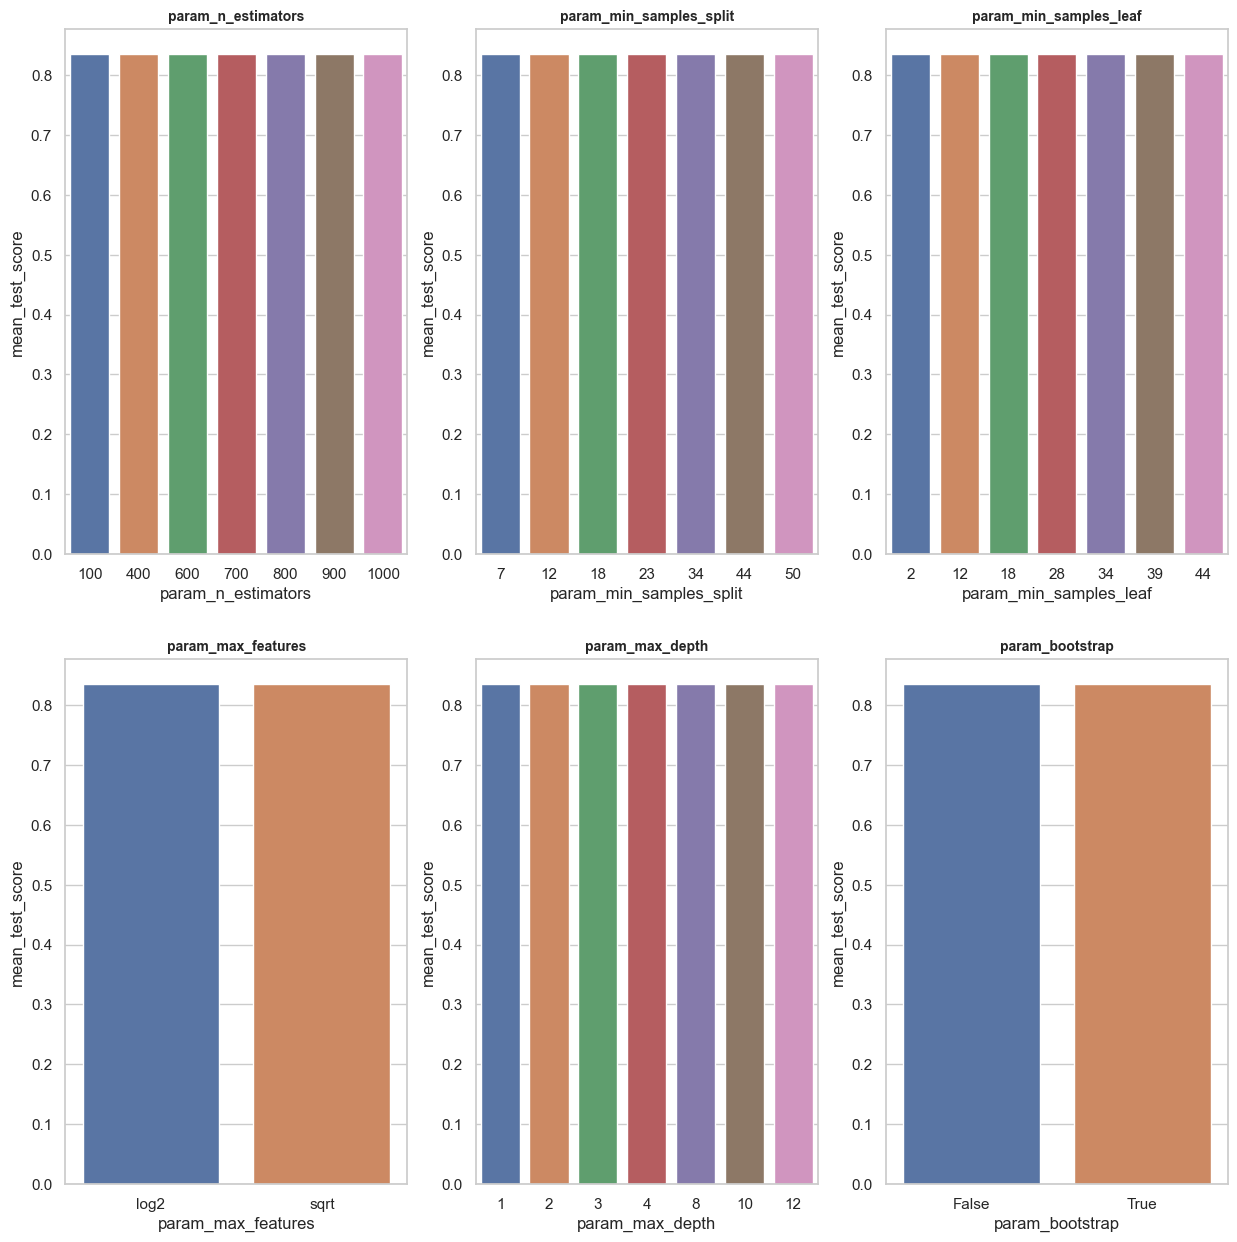

In [17]:
params_list=rs_df.columns

fig, axes = plt.subplots(ncols=3, nrows=2)
sns.set(style="whitegrid", color_codes=True, font_scale = 1)
fig.set_size_inches(15,15)

for param_name, axs in zip(params_list, axes.flatten()):
    sns.barplot(x=param_name, y='mean_test_score', data=rs_df, ax=axs)
    axs.set_title(label = param_name, size=10, weight='bold')
plt.show()

Гиперпараметры близки друг к другу по показателю эффективности. Можно использовать метод более детального поиска квазиоптимальных гиперпараметов.

####  Randomized Search CV method

In [ ]:
rfc_model=RandomForestClassifier(random_state=RANDOM_SEED)

n_estimators = [100,500,1000]
max_features = ['sqrt']
max_depth = [2,4,12]
min_samples_split = [2,20,50]
min_samples_leaf = [2,20,40]
bootstrap = [False]
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

gs = GridSearchCV(rfc_model, param_grid, cv = 3, verbose = 3)
gs.fit(x_train_data, y_train_data.ravel())
rfc = gs.best_estimator_
gs.best_params_

Использованный метод показывает результаты аналогичные предыдущему, соответственно крайне левых значений гиперпараметров достаточно для обучения модели.

### Fitting and evaluate best model

In [22]:
rfc_model=RandomForestClassifier(max_depth=14, n_estimators=100, max_features='sqrt', random_state=RANDOM_SEED)
rfc_model.fit(x_train_data, y_train_data.ravel())
y_pred = rfc_model.predict(x_test_data)
report = classification_report(y_test_data.ravel(), y_pred, digits=5)

In [28]:
print(report)

              precision    recall  f1-score   support

           0    0.83829   0.99589   0.91032     40420
           1    0.56545   0.02706   0.05166      7981

    accuracy                        0.83614     48401
   macro avg    0.70187   0.51148   0.48099     48401
weighted avg    0.79330   0.83614   0.76873     48401



Text(0.5, 1.0, 'ROC curve')

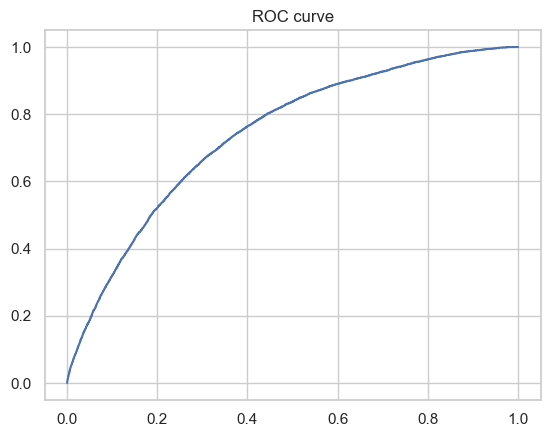

In [26]:
y_pred = rfc_model.predict_proba(x_test_data)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test_data.ravel(), y_pred)
auc = round(metrics.roc_auc_score(y_test_data.ravel(), y_pred), 5)

plt.plot(fpr, tpr, label="RandomForest, AUC="+str(auc))
plt.title('ROC curve')

In [27]:
auc

0.74142

Площадь под кривой существенно отличается от половинной, что позволяет предположить, что данную модель можно использовать. Для повышения показателей классификации можно использовать методы основанные на алгоритмах бустинга или искусственные нейронные сети со свёрточной основой.